In [134]:
%matplotlib inline
from matplotlib import pyplot as plt
from tqdm import tqdm
import numpy as np
import seaborn as sns
from collections import defaultdict
from termcolor import colored, cprint
from PIL import Image
import os
import pickle
import json
import cv2

In [68]:
# create giant dictionary for all data
data_dir = 'mmhs150k/'
tweet_dict = json.load(open(data_dir + 'MMHS150K_GT.json', 'r'))
print('Length of Tweet Dictionary:', len(tweet_dict))

data_dict = dict()
for k, v in tweet_dict.items(): data_dict[k] = {'tweet_text': v['tweet_text'], 
                                                'labels': v['labels']}
    
label_to_str = {0: 'NotHate', 1: 'Racist', 2: 'Sexist', 3: 'Homophobe', 4: 'Religion', 5: 'OtherHate'}

Length of Tweet Dictionary: 149823


Number of Positive Votes: 0 Tweet Count: 57931
Number of Positive Votes: 1 Tweet Count: 54923
Number of Positive Votes: 2 Tweet Count: 28395
Number of Positive Votes: 3 Tweet Count: 8574


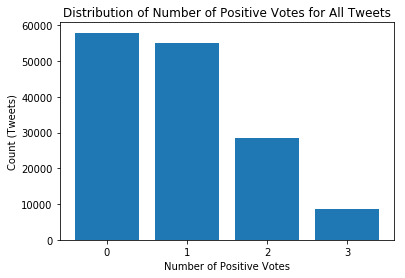

In [57]:
# plot disagreements (positive vs negative)
vote_dict = defaultdict(lambda: 0)
for k, v in data_dict.items():
    votes = [0 if vote == 0 else 1 for vote in v['labels']]
    vote_dict[sum(votes)] += 1
    
for k, v in vote_dict.items():
    print('Number of Positive Votes:', k, 'Tweet Count:', v)

labels, counts = zip(*vote_dict.items())
plt.bar([str(x) for x in labels],counts)
plt.ylabel('Count (Tweets)')
plt.xlabel('Number of Positive Votes')
plt.title('Distribution of Number of Positive Votes for All Tweets')
plt.show()

Number of Positive Votes: 0.00 Tweet Count: 57931
Number of Positive Votes: 0.33 Tweet Count: 54897
Number of Positive Votes: 0.50 Tweet Count: 15
Number of Positive Votes: 1.00 Tweet Count: 8577
Number of Positive Votes: 0.20 Tweet Count: 2
Number of Positive Votes: 0.67 Tweet Count: 28388
Number of Positive Votes: 0.25 Tweet Count: 13


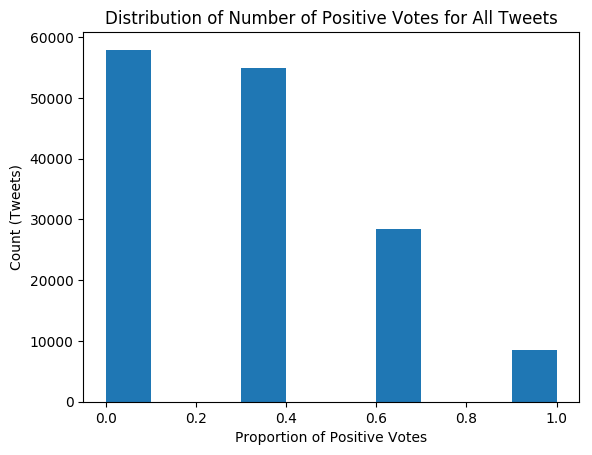

In [88]:
# plot disagreements (positive vs negative)
vote_dict = defaultdict(lambda: 0)
for k, v in data_dict.items():
    votes = [0 if vote == 0 else 1 for vote in v['labels']]
    vote_dict[sum(votes)/len(votes)] += 1
    
for k, v in vote_dict.items(): print('Number of Positive Votes:', "{:.2f}".format(k), 'Tweet Count:', v)

labels, counts = zip(*vote_dict.items())
plt.hist(labels, weights=counts)
plt.ylabel('Count (Tweets)')
plt.xlabel('Proportion of Positive Votes')
plt.title('Distribution of Number of Positive Votes for All Tweets')
plt.show()

Cases with more or less than 3 votes and at least 1 positive vote: 33
Cases with more or less than 3 votes: 74 

Labels: ['NotHate', 'NotHate', 'Racist'] Count: 30324
Labels: ['NotHate', 'NotHate', 'OtherHate'] Count: 10359
Labels: ['NotHate', 'Racist', 'Racist'] Count: 8898
Labels: ['NotHate', 'NotHate', 'Sexist'] Count: 8877
Labels: ['NotHate', 'NotHate', 'Homophobe'] Count: 4235
Labels: ['NotHate', 'OtherHate', 'OtherHate'] Count: 3797
Labels: ['NotHate', 'Racist', 'OtherHate'] Count: 3140
Labels: ['NotHate', 'Sexist', 'Sexist'] Count: 2270
Labels: ['NotHate', 'Homophobe', 'Homophobe'] Count: 2190
Labels: ['NotHate', 'Sexist', 'OtherHate'] Count: 2068


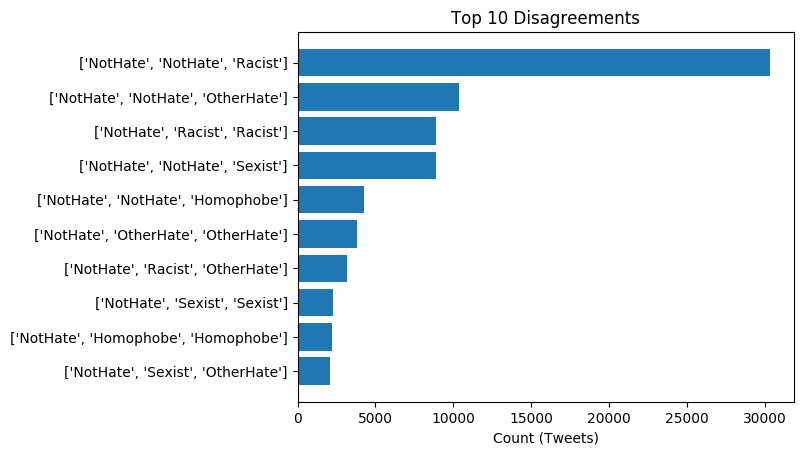

In [95]:
# analyze heterogeneity within positive examples
granular_votes = defaultdict(lambda: 0)
for k, v in data_dict.items():
    votes = [0 if vote == 0 else 1 for vote in v['labels']]
    if sum(votes) > 0: granular_votes[tuple(sorted(v['labels']))] += 1


print('Cases with more or less than 3 votes and at least 1 positive vote:', sum([count for label, count in granular_votes.items() if len(label) != 3]))
print('Cases with more or less than 3 votes:', len([(k, v) for (k, v) in data_dict.items() if len(v['labels']) != 3]), '\n')

plt.rcdefaults()
fig, ax = plt.subplots()

top10 = sorted(granular_votes.items(), key=lambda x: -x[1])[:10]
labels, counts = zip(*top10)
labels = [str([label_to_str[v] for v in triplet]) for triplet in labels]

for label, count in zip(labels, counts): print('Labels:', label, 'Count:', count)

y_pos = np.arange(10)
ax.barh(y_pos, counts, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(labels)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Count (Tweets)')
ax.set_title('Top 10 Disagreements')
plt.show()

Tweet body:
	@TeijiMack Decadent executive... make sure no nigga never miss me nooooo https://t.co/hLjwq5D0Bg
Image text:
	None


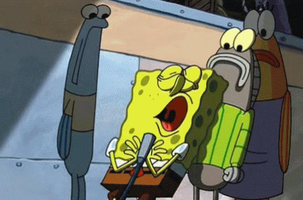


Tweet body:
	@itsrae_duh Me and my new nigga: https://t.co/PgcreSWRcm
Image text:
	None


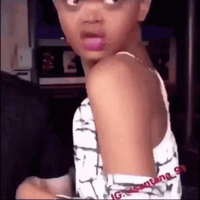


Tweet body:
	This nigger says the star move we always played in chess ke Sicilian Defence...no no no he is no longer a Senti https://t.co/dewfCd7YD7
Image text:
	None


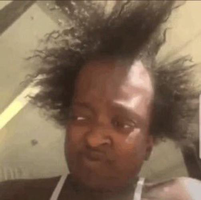


Tweet body:
	female wit a nigga mind set 👑 https://t.co/lDy1b9y5tp
Image text:
	None


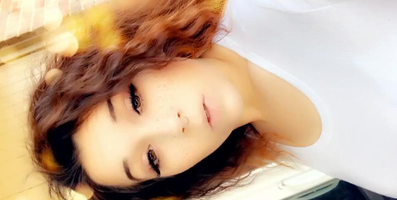


Tweet body:
	@foxnewsalert We will never surrender to SOCIALISM https://t.co/e3ug2oyanL
Image text:
	AMERICAN MILITIA We have been here since the beginning and we will be here until the end 


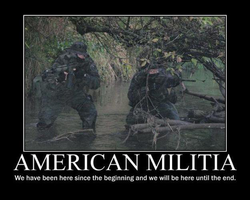


Tweet body:
	You Btches When Ya Nigga Apologize For Fucking Too Niggas &amp; A Rat &amp; They Want You To Come Back https://t.co/7ec2xB5ro1
Image text:
	OSend message 


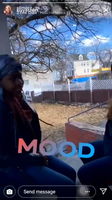


Tweet body:
	Lol Nigga Said Line Up On Tha Walll Lol We Cnt Fit All Des All Start On One Team💙🔒🏀 https://t.co/QzAiYBczcy
Image text:
	ELITE A TD ELITE ELITE& Sxpreme TD CJ2K TD ELITE xJah TD ELITE xGlockz TD 96 ELITE Hatty TD ELITE 


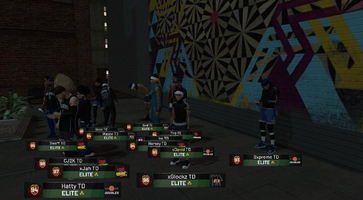


Tweet body:
	Nigga came back with all his best friends  Only pals I had was Smith &amp; Wesson https://t.co/DiaEk6stm8
Image text:
	None


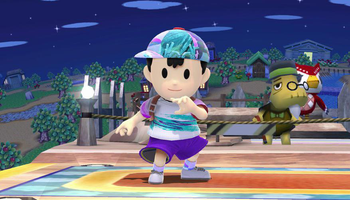


Tweet body:
	@DonDrewlio How’d they leave the lil nigga like that?! https://t.co/p2E4YKR72U
Image text:
	VLADT 


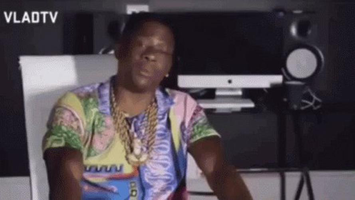


Tweet body:
	Hey sis break that nigga pockets https://t.co/9wlTeBbkuG
Image text:
	None


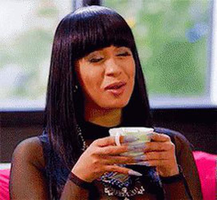


Tweet body:
	This nigga really in my Snapchat DMs talkin bout he had a nasty dream about me lol https://t.co/BFzmA3Dvfe
Image text:
	None


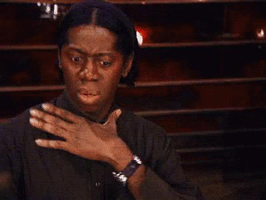


Tweet body:
	You ever socced a nigga so hard they called the paramedics? https://t.co/pC2XJstAQJ
Image text:
	#Showtime 


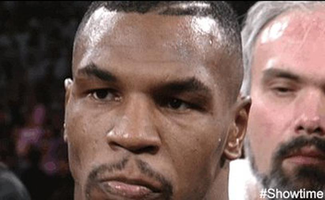


Tweet body:
	@Anethski You said jacquees... If he any type of real nigga he got HOOOOEEESSS!!!! https://t.co/Br7k9CSYGu
Image text:
	None


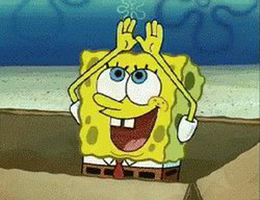


Tweet body:
	Also shout out to my nigga @Kintoki_Douji_  for surprising me with this before we left !!!! https://t.co/MgTQAvEMrn
Image text:
	None


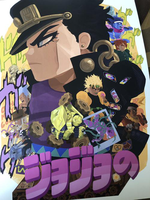


Tweet body:
	@Tanyaxd3 I literally feel like this nigga https://t.co/E5nKmX1eaz
Image text:
	None


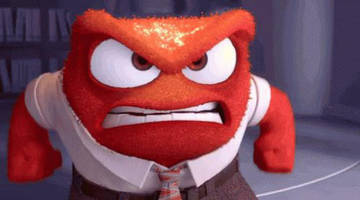


Tweet body:
	@KyleJRS_ @Jiovaunte She told me how she got caught by my dad with her side nigga in high school. https://t.co/Qu0a3LEwp9
Image text:
	it #wiLLANDGRACE NBC 


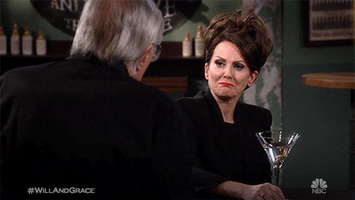


Tweet body:
	@jcsullivsn @amavibaby white people have never experienced racism and any person who wears MAGA hats are trash https://t.co/4xBYaPb0Wa
Image text:
	I said what I sald. 


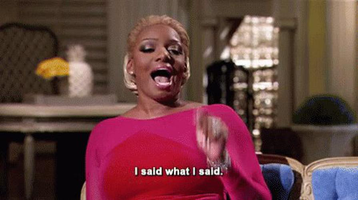


Tweet body:
	You was bragging bout that nigga now he toooken! https://t.co/twnjsHYJIs
Image text:
	None


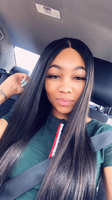


Tweet body:
	@DirrrtyDeAnna Accusing? NIGGA  HE LITERALLY FT ME JUST TO SAY “no one will hear you scream” and posted this https://t.co/GNMZCA3nDK
Image text:
	None


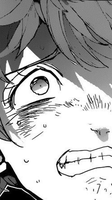


Tweet body:
	@JustJameis @WendyWilliams Nigga yo ass izzz in trouble https://t.co/yjHhQbWXme
Image text:
	None


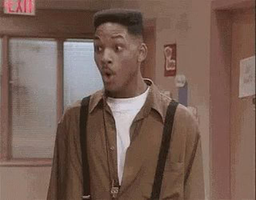

In [136]:
# view examples of [not hate, not hate, racist]
from PIL import Image
for k, v in [(k, v) for (k, v) in data_dict.items() if sorted(v['labels']) == [0,0,1]][:20]:
    cprint('Tweet body:', 'red')
    cprint('\t' + v['tweet_text'])
    
    cprint('Image text:', 'red')
    try:
        text = json.load(open(data_dir + 'img_txt/' + k + '.json', 'r'))
        print('\t' + text['img_text'])
    except Exception as e: print('\tNone')
    
    height = 200
    im = Image.open(data_dir + 'img_resized/' + k + '.jpg')
    im = im.resize((int(height * im.size[0]/float(im.size[1])), height), Image.ANTIALIAS)
    display(im)
    print()